<a href="https://colab.research.google.com/github/sksoumik/machine-learning-projects/blob/master/selfie_segmentation_mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

http://solutions.mediapipe.dev/selfie_segmentation).

In [1]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.


Upload any person image to the Colab


In [5]:
from google.colab import files
uploaded = files.upload()

Saving IMG_5073.JPG to IMG_5073 (1).JPG
Saving IMG_8819.JPG to IMG_8819 (1).JPG


IMG_5073.JPG


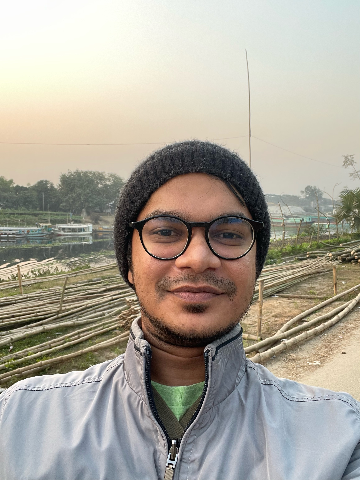

IMG_8819.JPG


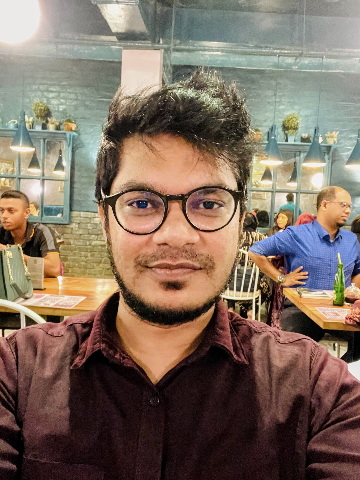

In [6]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Selfie Segmentation solution, we can access this module as `mp_selfie_segmentation = mp.solutions.selfie_segmentation`.

You may change the `model selection` parameter during the initialization. Run `help(mp_selfie_segmentation.selfie_segmentation)` to get more informations about the parameter.

In [7]:
import mediapipe as mp
mp_selfie_segmentation = mp.solutions.selfie_segmentation

help(mp_selfie_segmentation.SelfieSegmentation)

Help on class SelfieSegmentation in module mediapipe.python.solutions.selfie_segmentation:

class SelfieSegmentation(mediapipe.python.solution_base.SolutionBase)
 |  SelfieSegmentation(model_selection=0)
 |  
 |  MediaPipe Selfie Segmentation.
 |  
 |  MediaPipe Selfie Segmentation processes an RGB image and returns a
 |  segmentation mask.
 |  
 |  Please refer to
 |  https://solutions.mediapipe.dev/selfie_segmentation#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      SelfieSegmentation
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, model_selection=0)
 |      Initializes a MediaPipe Selfie Segmentation object.
 |      
 |      Args:
 |        model_selection: 0 or 1. 0 to select a general-purpose model, and 1 to
 |          select a model more optimized for landscape images. See details in
 |          https://solutions.mediapipe.dev/selfie_segmentation#model_selectio

Segmentation mask of IMG_5073.JPG:


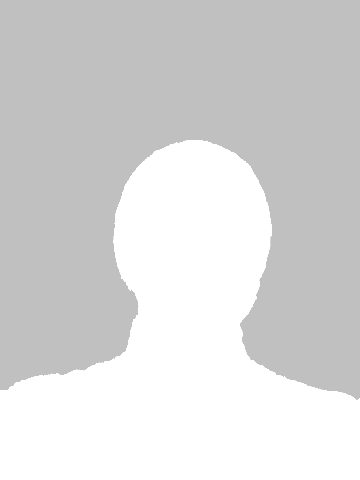

Segmentation mask of IMG_8819.JPG:


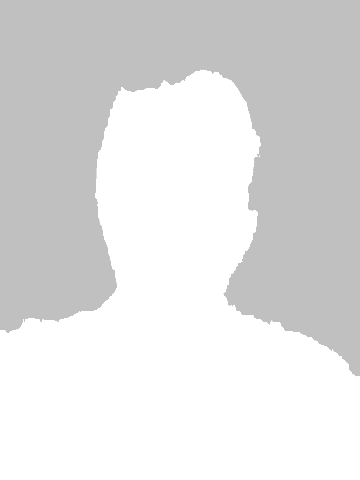

In [8]:
# Show segmentation masks.
BG_COLOR = (192, 192, 192) # gray
MASK_COLOR = (255, 255, 255) # white

with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
    # Generate solid color images for showing the output selfie segmentation mask.
    fg_image = np.zeros(image.shape, dtype=np.uint8)
    fg_image[:] = MASK_COLOR
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.2
    output_image = np.where(condition, fg_image, bg_image)

    print(f'Segmentation mask of {name}:')
    resize_and_show(output_image)

Blurred background of IMG_5073.JPG:


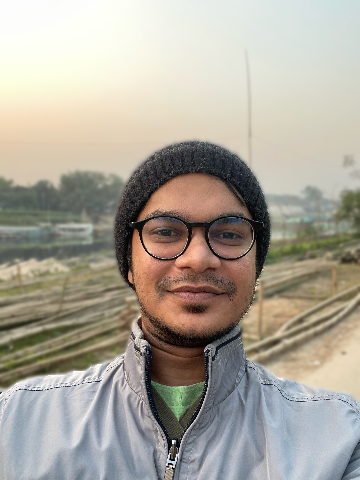

Blurred background of IMG_8819.JPG:


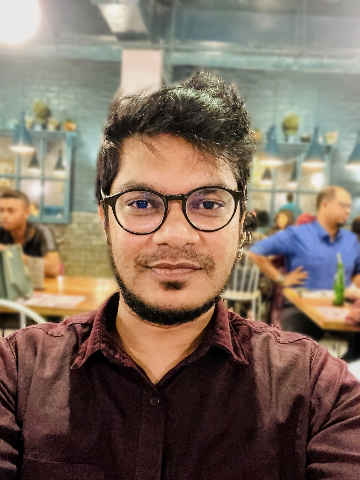

In [15]:
# Blur the image background based on the segementation mask.
with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    blurred_image = cv2.GaussianBlur(image,(55,55),0)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.5
    output_image = np.where(condition, image, blurred_image)
    
    print(f'Blurred background of {name}:')
    resize_and_show(output_image)

## Make the blur more intense

Blurred background of IMG_5073.JPG:


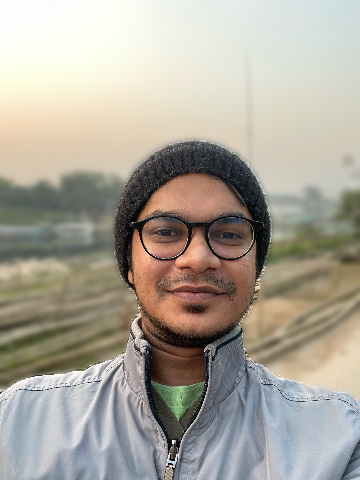

Blurred background of IMG_8819.JPG:


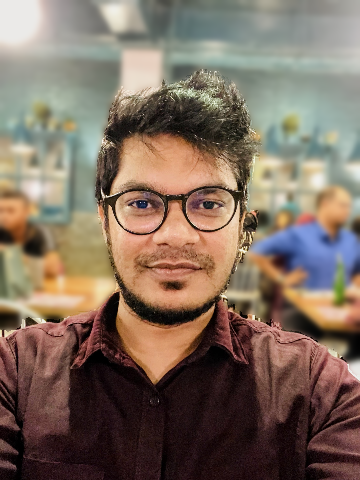

In [19]:
num_blur_iterations = 4

with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    blurred_image = image
    for i in range(num_blur_iterations):
        blurred_image = cv2.GaussianBlur(blurred_image,(55,55),0)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    output_image = np.where(condition, image, blurred_image)
    
    print(f'Blurred background of {name}:')
    resize_and_show(output_image)


## Change the background to Black

Black background of IMG_5073.JPG:


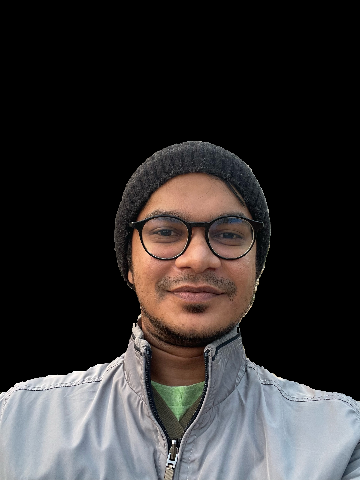

Black background of IMG_8819.JPG:


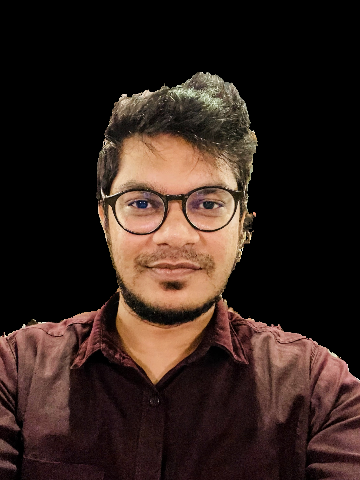

In [23]:
with mp_selfie_segmentation.SelfieSegmentation() as selfie_segmentation:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Selfie Segmentation.
    results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    black_image = np.zeros(image.shape, dtype=np.uint8)
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.5
    output_image = np.where(condition, image, black_image)
    
    print(f'Black background of {name}:')
    resize_and_show(output_image)